In [36]:
%matplotlib inline
from scipy.sparse import load_npz
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud


tfm = load_npz("tfm.npz")
tfidf_transformed = load_npz("tfidf_transformed.npz")
vocab = np.genfromtxt("vocabulary.txt",dtype="str")
lasso_tfidf_coef = pd.read_csv("/Users/jonathan/AnacondaProjects/MLPS/Project/mlps-project/Lasso Coefs/lasso_tfidf_coef.csv",dtype="str")
lass_allCat1_coef_transposed = pd.read_csv("/Users/jonathan/AnacondaProjects/MLPS/Project/mlps-project/Lasso Coefs/lass_allCat1_coef_transposed.csv",dtype="str")


In [2]:
#1482535x1798
tfm_sum = np.asarray(np.sum(tfm, axis = 0))[0,:]
tfidf_transformed_sum = np.asarray(np.sum(tfidf_transformed, axis = 0))[0,:]

In [3]:
vocab_tf = dict(zip(vocab, tfm_sum))
vocab_tf_idf = dict(zip(vocab, tfidf_transformed_sum))

In [6]:
import operator
vocab_tf_sorted = sorted(vocab_tf.items(), key=operator.itemgetter(1), reverse=True)[:20]
vocab_tf_idf_sorted = sorted(vocab_tf_idf.items(), key=operator.itemgetter(1), reverse=True)[:20]

In [5]:
type(vocab_tf_sorted[0])
top_tf= [t[0] for t in vocab_tf_sorted]
top_tf

['new',
 'size',
 'ship',
 'brand',
 'condit',
 'free',
 'use',
 'rm',
 'thi',
 'worn',
 'price',
 'color',
 'great',
 'bundl',
 'black',
 'tag',
 'item',
 'pleas',
 'pink',
 'onli']

In [8]:
top_tf_idf = [t[0] for t in vocab_tf_idf_sorted]
top_tf_idf


[('new', 490593),
 ('size', 480507),
 ('ship', 327506),
 ('brand', 276385),
 ('condit', 258758),
 ('free', 258013),
 ('use', 235433),
 ('rm', 213694),
 ('thi', 192185),
 ('worn', 185706),
 ('price', 175586),
 ('color', 172299),
 ('great', 153837),
 ('bundl', 152316),
 ('black', 145350),
 ('tag', 134802),
 ('item', 129509),
 ('pleas', 119623),
 ('pink', 119125),
 ('onli', 116107)]

In [ ]:
# # 
# wc = WordCloud(background_color="white", width=1100, height= 800)
# wc.generate_from_frequencies(frequencies = vocab_tf_idf)
# plt.figure(figsize=(11,8))
# plt.axis("off")
# plt.imsave('term_frequency_wordcloud.png', wc, dpi=600)



In [ ]:
# # 
# wc.generate_from_frequencies(frequencies = vocab_tf_idf)
# plt.axis("off")
# plt.imsave('tf_idf_wordcloud.png', wc, dpi=600)

In [40]:
def makeWC(vocab, data, save_name, height, width):
    dictionary = dict(zip(vocab, data))
    wc = WordCloud(background_color="white", width=1100, height= 800)
    wc.generate_from_frequencies(frequencies = dictionary)
    plt.figure(figsize=(height,width))
    plt.axis("off")
    plt.imsave(save_name, wc, dpi=600)
    

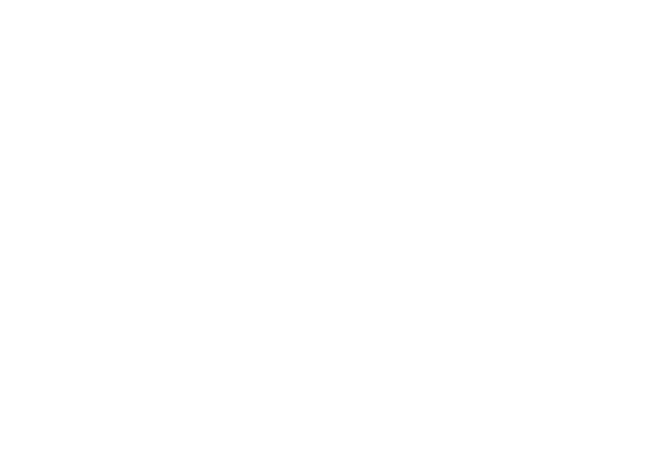

In [27]:
lasso_tfidf_coef[lasso_tfidf_coef.columns[1]]
wc = makeWC(vocab, lasso_tfidf_coef[lasso_tfidf_coef.columns[1]].astype('float'), "WC_lasso_tfidf_coef_.png", 11,8)
dictionary = dict(zip(vocab, lasso_tfidf_coef[lasso_tfidf_coef.columns[1]].astype('float')))
sorted_lasso_tfidf_coef_sorted = sorted(dictionary.items(), key=operator.itemgetter(1), reverse=True)[:10]
sorted_lasso_tfidf_coef = [t[0] for t in sorted_lasso_tfidf_coef_sorted]
print(sorted_lasso_tfidf_coef)

In [37]:
lass_allCat1_coef_transposed.head()

,Unnamed: 0,category_name_1_Beauty,category_name_1_Electronics,category_name_1_Handmade,category_name_1_Home,category_name_1_Kids,category_name_1_Men,category_name_1_Other,category_name_1_Sports & Outdoors,category_name_1_Vintage & Collectibles,category_name_1_Women
0,abercrombi,0.0,-0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.0
1,abl,0.0,5.7626505046746574,0.0,-0.0,-0.0,-0.0,3.194170274573697,-84.61536424050999,0.0,-0.0
2,abov,-0.0,2.837574653883288,26.69828449177655,5.917203378505123,3.5181839901790823,-0.0,-0.0,-0.0,12.381959851453912,-0.0
3,absolut,0.0,-16.537536661701452,-1.023949677329907,-0.0,0.0,0.0,-2.4016006404941144,-4.716440534202642,47.121022179535025,10.465612828141401
4,absorb,-0.0,1.9902643531123148,0.0,-0.0,-0.0,0.0,5.931123908016047,-0.0,0.0,-0.0


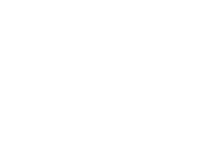

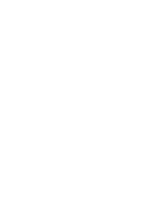

In [43]:

wc = makeWC(vocab, lass_allCat1_coef_transposed["category_name_1_Beauty"].astype('float'), "WC_lasso_cat_Beauty.png", 3,2)
wc = makeWC(vocab, lass_allCat1_coef_transposed["category_name_1_Electronics"].astype('float'), "WC_lasso_cat_electronics.png", 2,3)
